# Figure 6

In [1]:
library(data.table)
library(ggplot2)
library(stringr)
library(tidyplots)
library(ggpubr)
library(patchwork)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:tidyplots’:

    gene_expression




In [2]:
library('Cairo')
CairoFonts(
regular="Sans:style=Light",
bold="Sans:style=Bold",
italic="Sans:style=Oblique",
bolditalic="Sans:style=BoldOblique"
)

## Fig. 6a

> made in igv

## Fig. 6b

In [3]:
liu_apa = fread("Fig_6b_Liu_2019_targeted_apa_analysis_of_TMEM106B.csv")

In [4]:
liu_tmem106b_plot = ggpaired(liu_apa, 
                  x = "condition",
                  y = "Normalized_ratio",
                  id = "group",
                  fill = c("white", "orange"),
                  palette = "jco",
                  point.size = 0.5,
                  line.size = 0.5,
                  line.color = "light gray",  
                  xlab = "Sample",
                  ylab = "3' UTR ratio: long/total",
                  font.label = list(size = 7, color = "black")) +
        stat_compare_means(paired = TRUE, 
                           method = "t.test", 
                           method.args = list(alternative = "greater"),
                           label = "p")

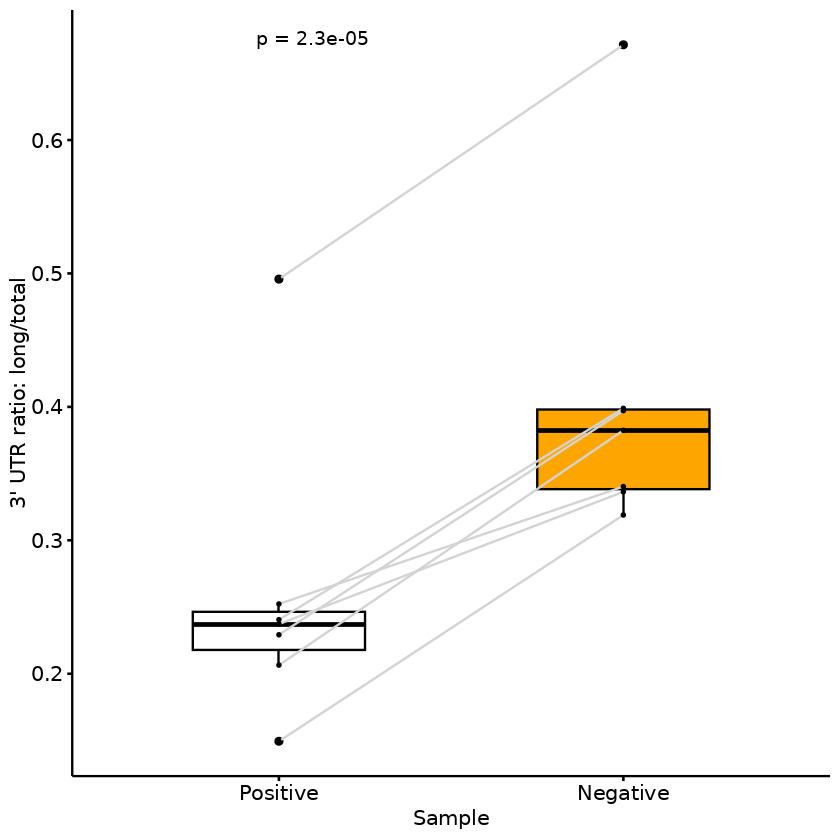

In [5]:
liu_tmem106b_plot

In [6]:
ggsave("fig_6b.pdf", liu_tmem106b_plot, height = 2.5, width = 2.5, units = "in", dpi = 300)

## Fig.6c

> from Vidhya (Petrucelli lab)

## Fig. 6d

In [7]:
tmem106b_WB = fread("Fig_6d_TDP43-12d-KD_TMEM106B-TDP43-WB-quantitation.csv")

In [8]:
unique(tmem106b_WB$target)

[1] "TDP-43"  "Dimer"   "Monomer"

In [9]:
tmem106b_tdp43_plot = tmem106b_WB[target == "TDP-43"] |>
    tidyplot(x = Sample, y = normalized_ratio, color = Sample) |>
    add_data_points_jitter(jitter_width = 0.2, size = 0.5, color = "gray") |>
    add_mean_dash(width = 0.5) |>
    add_sem_errorbar(width = 0.25) |>
    add_test_pvalue(hide_info = TRUE, 
                       method = "t_test",
                       method.args = list(alternative = "greater"),
                       ref.group = "Control") |>
    adjust_colors(new_colors = c("black", "orange"),) |> 
    adjust_x_axis(title = "TDP-43",
                  labels = c("Control", "TDP-43\nKD")) |>
    adjust_y_axis(title = "Normalized ratio",
                  limits = c(0, 1.5), breaks = c(0, 0.5, 1.0)) |>
    remove_legend() |>
    adjust_font(fontsize = 6) |>
    adjust_size(width = 0.8, height = 1, unit = "in")

In [10]:
tmem106b_dimer_plot = tmem106b_WB[target == "Dimer"] |>
    tidyplot(x = Sample, y = normalized_ratio, color = Sample) |>
    add_data_points_jitter(jitter_width = 0.2, size = 0.5, color = "gray") |>
    add_mean_dash(width = 0.5) |>
    add_sem_errorbar(width = 0.25) |>
    add_test_pvalue(hide_info = TRUE, 
                       method = "t_test",
                       method.args = list(alternative = "greater"),
                       ref.group = "Control") |>
    adjust_colors(new_colors = c("black", "orange"),) |> 
    adjust_x_axis(title = "TMEM106B\ndimer",
                  labels = c("Control", "TDP-43\nKD")) |>
    adjust_y_axis(title = NULL,
                  limits = c(0, 1.5), 
                  labels = NULL) |>
    remove_y_axis_line() |>
    remove_y_axis_ticks() |>
    remove_legend() |>
    adjust_font(fontsize = 6) |>
    adjust_size(width = 0.8, height = 1, unit = "in")

In [11]:
tmem106b_monomer_plot = tmem106b_WB[target == "Monomer"] |>
    tidyplot(x = Sample, y = normalized_ratio, color = Sample) |>
    add_data_points_jitter(jitter_width = 0.2, size = 0.5, color = "gray") |>
    add_mean_dash(width = 0.5) |>
    add_sem_errorbar(width = 0.25) |>
    add_test_pvalue(hide_info = TRUE, 
                       method = "t_test",
                       ref.group = "Control",
                       method.args = list(alternative = "greater"),
                       hide.ns = FALSE) |>
    adjust_colors(new_colors = c("black", "orange"),) |> 
    adjust_x_axis(title = "TMEM106B\nmonomer",
                  labels = c("Control", "TDP-43\nKD")) |>
    adjust_y_axis(title = NULL,
                  limits = c(0, 1.5), 
                  labels = NULL) |>
    remove_y_axis_line() |>
    remove_y_axis_ticks() |>
    remove_legend() |>
    adjust_font(fontsize = 6) |>
    adjust_size(width = 0.8, height = 1, unit = "in")

In [12]:
tmem106_wb_plot = tmem106b_tdp43_plot + tmem106b_dimer_plot + tmem106b_monomer_plot

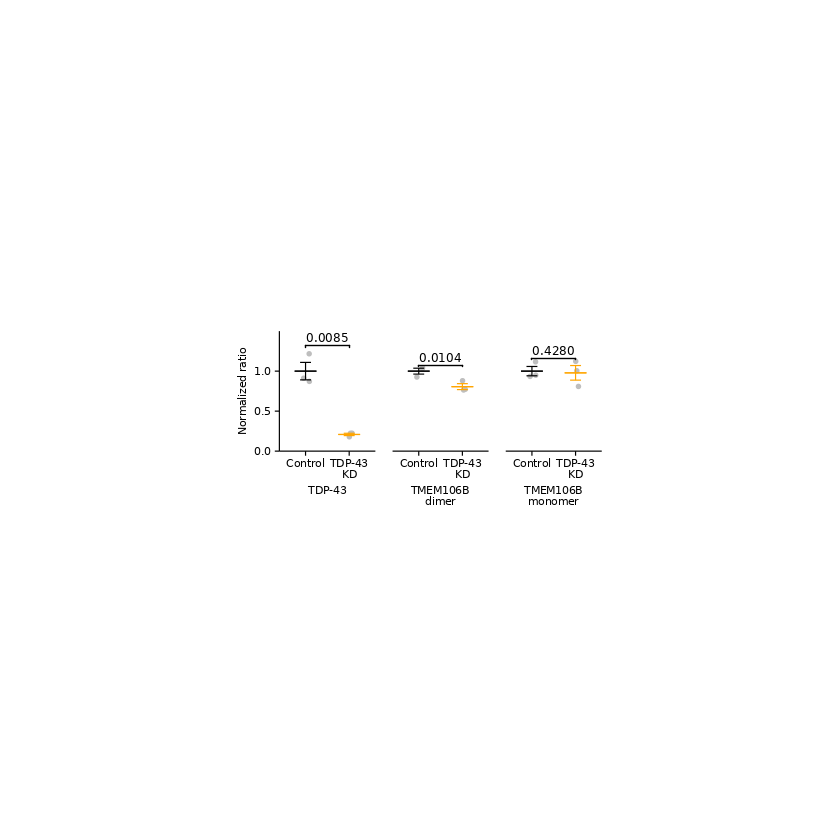

In [13]:
tmem106_wb_plot

In [14]:
ggsave("fig_6d_TDP43-12D-KD-TMEM106B-TDP43-WB-quantitation-plot.pdf", tmem106_wb_plot, dpi = 300)

Saving 6.67 x 6.67 in image


## Fig. 6e

made in illustrator

## Fig. 6f

In [15]:
tmem106b_luciferase = fread("Fig_6f_tmem106b_luciferase_activity.csv")

In [16]:
unique(tmem106b_luciferase$Plasmid)

[1] "pmiroGlo"         "short3UTR"        "Long3UTR-mutPAS1"

In [17]:
tmem106b_luciferase$Plasmid = factor(tmem106b_luciferase$Plasmid, levels = c('pmiroGlo','short3UTR','Long3UTR-mutPAS1'))

In [18]:
tmem_luciferase_plot = ggplot(tmem106b_luciferase, aes(Plasmid, ratio, color = Plasmid)) +
      geom_point(position = position_jitter(width = 0.2), 
             show.legend = F, 
             size = 0.5, 
             color = "darkgray") +
    stat_summary(fun.data = "mean_se",
                 geom = "errorbar",
                 linewidth = 0.25,
                 width = 0.3,
                 show.legend = F) +
    stat_summary(fun = mean,
                 fun.min = mean,
                 fun.max = mean,
                 geom = "errorbar",
                 linewidth = 0.25,
                 width = 0.5,
                 show.legend = F) +
    scale_x_discrete(name = "TMEM106B 3' UTR", labels = c("No insert", "Short", "Long")) +
    scale_y_continuous(name = "Luciferase activity\n(Firefly/Renilla)", limits = c(0, 70)) +
    theme_classic(base_size = 7) +
    stat_compare_means(comparisons = list(c("short3UTR", "Long3UTR-mutPAS1")), method = "t.test", method.args = list(alternative = "greater"), label = "p", size = 6/.pt) +
    scale_color_manual(values = c("gray","black", "orange"))

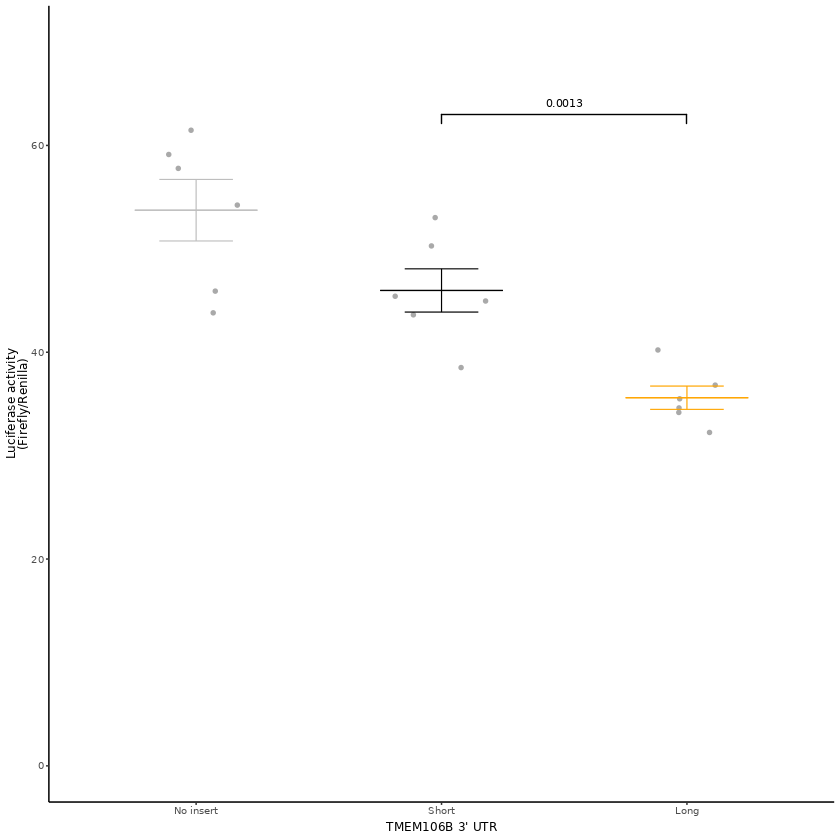

In [19]:
tmem_luciferase_plot

In [20]:
luciferase_RNA = fread("Fig_6f_tmem106b_luciferase_RNA_levels.csv")

In [21]:
luciferase_RNA$group = factor(luciferase_RNA$group, levels = c('No-insert','Short','Long-mut'))

In [22]:
luciferase_RNA_plot = ggplot(luciferase_RNA, aes(group, ratio_Firefly_Renilla, color = group)) + 
    #geom_boxplot(show.legend = F, size = 0.2)+
    geom_point(position = position_jitter(width = 0.2), 
             show.legend = F, 
             size = 0.5, 
             color = "darkgray") +
    stat_summary(fun.data = "mean_se",
                 geom = "errorbar",
                 linewidth = 0.25,
                 width = 0.3,
                 show.legend = F) +
    stat_summary(fun = mean,
                 fun.min = mean,
                 fun.max = mean,
                 geom = "errorbar",
                 linewidth = 0.25,
                 width = 0.5,
                 show.legend = F) +
    scale_x_discrete(name = "TMEM106B 3' UTR",labels = c("No insert", "Short", "Long")) +
    scale_y_continuous(name = "RNA level\n(Firefly/Renilla)", limits = c(0, 0.75)) +
    stat_compare_means(comparisons = list(c("Short", "Long-mut")), method = "t.test", method.args = list(alternative = "less"), label = "p", size = 6/.pt) +
  scale_color_manual(values = c("gray", "black", "orange")) +
  theme_classic(base_size = 7)

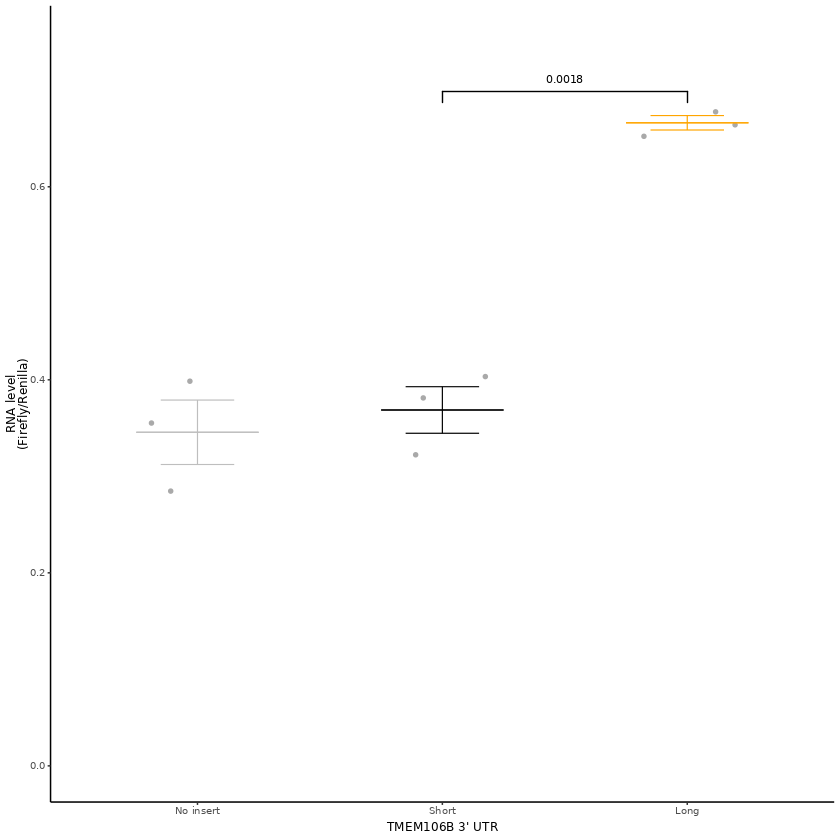

In [23]:
luciferase_RNA_plot

In [24]:
fig_6f = tmem_luciferase_plot + luciferase_RNA_plot

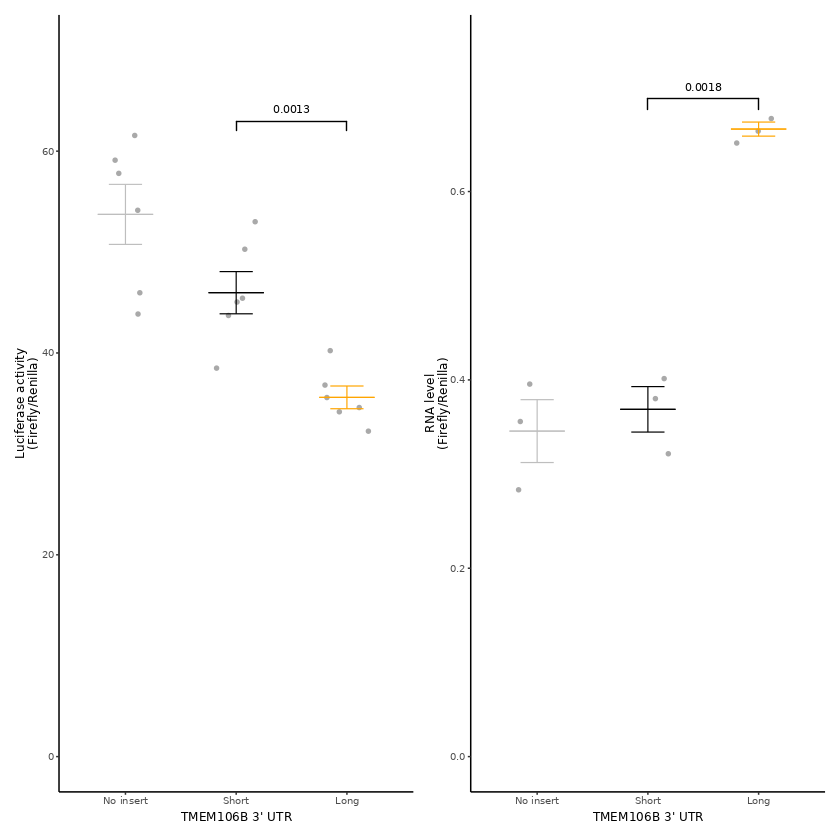

In [25]:
fig_6f

In [26]:
ggsave("fig_6f_TMEM106B-luciferase-plot.pdf", fig_6f, width = 3, height = 1.75, units = "in",dpi = 300)

In [27]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /share/software/user/open/openblas/0.3.10/lib/libopenblas_haswellp-r0.3.10.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] Cairo_1.6-2       patchwork_1.2.0   ggpubr_0.6.0      tidyplots_0.2.2  
[5] stringr_1.5.1     ggplot2_3.5.0     data.table_1.15.2

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-11     tidyselect_1.2.1  repr_1.1.6        purrr_1.0.2      
 [5] carData_3.0-5     colorspace_2